In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression


In [2]:
file_path = 'https://raw.githubusercontent.com/scrannad/Medicare-Project/Janice_branch_set/numeric_only.csv'
df = pd.read_csv(file_path)
df.head(25)

,Beneficiaries_with_A_and_B,Fee_for_service_beneficiaries,Med_Advantage_Count,Med_Advantage_Rate,Average_Age,%Female,%Male,%White,%Black,%Hispanic,...,Dialysis_User_Count,Dialysis_User_%,Dialysis_Visits_Per_1000_Users,FQHC_Std_Costs,FQHC_Std_As_%Total,FQHC_Std_Per_Capita,FQHC_Std_Per_User,FQHC_User_Count,FQHC_User_%,FQHC_Visits_Per_1000_Users
0,6444,6186,258,0.0400,71,0.5144,0.4856,0.8810,0.0063,0.0833,...,40,0.0065,741,330449.22,0.0068,53.42,306.26,1079,0.1744,553
1,7463,6861,602,0.0807,73,0.5270,0.4730,0.9469,0.0020,0.0144,...,19,0.0028,437,37418.97,0.0007,5.45,558.49,67,0.0098,39
2,14583,13311,1272,0.0872,71,0.5330,0.4670,0.9246,0.0072,0.0336,...,74,0.0056,665,1257134.97,0.0100,94.44,554.54,2267,0.1703,773
3,18984,17907,1077,0.0567,72,0.5456,0.4544,0.8645,0.0168,0.0782,...,86,0.0048,554,1058899.69,0.0063,59.13,605.43,1749,0.0977,387
4,6134,5925,209,0.0341,70,0.5232,0.4768,0.9391,0.0025,0.0253,...,38,0.0064,659,69716.25,0.0013,11.77,400.67,174,0.0294,86
5,5256,4734,522,0.0993,72,0.5239,0.4761,0.8925,0.0055,0.0606,...,18,0.0038,481,111911.30,0.0027,23.64,592.12,189,0.0399,170
6,100102,93339,6763,0.0676,74,0.5273,0.4727,0.9182,0.0040,0.0373,...,247,0.0026,327,10000026.42,0.0122,107.14,625.00,16000,0.1714,652
7,11777,10945,832,0.0706,52,0.4838,0.5162,0.8429,0.0170,0.0744,...,209,0.0191,2238,1870255.00,0.0156,170.88,704.69,2654,0.2425,1164
8,111879,104284,7595,0.0679,72,0.5227,0.4773,0.9103,0.0053,0.0412,...,456,0.0044,527,11870281.41,0.0127,113.83,636.34,18654,0.1789,706
9,6065,2703,3362,0.5543,67,0.4639,0.5361,0.9811,0.0070,0.0041,...,29,0.0107,1118,1023021.51,0.0388,378.48,596.86,1714,0.6341,4074


**choosing Hospital_Readmit_Count as the target **

In [22]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Hospital_Readmit_Count'].abs().sort_values(ascending=False)
print(correlation_with_target)


Hospital_Readmit_Count                         1.000000
IP_Users                                       0.993006
IP_Standardized_Costs                          0.991648
ER_Visits_Count                                0.990899
Total_Standardized_Costs                       0.983911
                                                 ...   
Standardized_Risk_Adjusted_Per_Capita_Costs    0.008932
HH_Per_1000_Users                              0.006726
HH_Std_Per_User                                0.003286
Hospice_Std_Per_User                           0.002342
SNF_Std_As_%Total                              0.000041
Name: Hospital_Readmit_Count, Length: 82, dtype: float64


with IP_Users   0.993006 closest it was choosen to be the feature 

In [28]:
relevant_features = correlation_with_target[correlation_with_target >= 0.2].index.tolist()

**Feature - IP_Users**

In [24]:
features = df[['IP_Users']] 
target = df['Hospital_Readmit_Count']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression()

In [19]:
y_pred = model.predict(X_test)  

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 1016656.728089227
Mean Absolute Error: 278.9401482785233
R-squared: 0.9874639893640983


High R-squared value indicates that model could capture prominent portion of the variance 

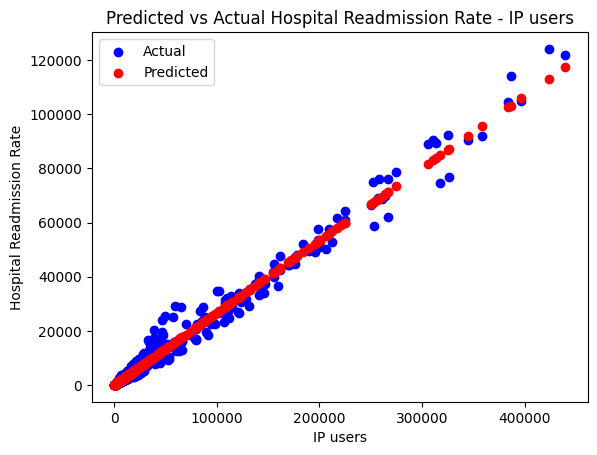

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('IP users')
plt.ylabel('Hospital Readmission Rate')
plt.title('Predicted vs Actual Hospital Readmission Rate - IP users')
plt.legend()
plt.show()

plt.savefig('scatter_plot.png') 

Feature - 